In [5]:
from empiricaldist import Pmf
import numpy as np
hypos = np.linspace(0, 1, 101)
prior = Pmf(np.ones_like(hypos), hypos)


In [8]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [21]:
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}
dataset = 'H' * 140 + 'T' * 110

def update_euro(pmf, dataset):
    for data in dataset:
        for hypo in pmf.qs:
            pmf[hypo] *= likelihood[data][hypo]
        pmf.normalize()



hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
posterior = prior.copy()
update_euro(posterior,dataset)

In [22]:
unifor = Pmf(1, hypos, name = 'un')

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [36]:
from empiricaldist import Pmf
import numpy as np

# Create a triangular shape from 0 up to 50 and back to 0 at 100
ramp_up = np.arange(51)       # 0 to 50
ramp_down = np.arange(49, -1, -1)  # 49 to 0
triangle_values = np.concatenate([ramp_up, ramp_down])  # total 100 values

# Hypotheses from 0 to 100 (length 100)
hypos = np.arange(101)

# Create PMF
triangle = Pmf(triangle_values, hypos)
triangle.normalize()


2500

In [37]:
update_euro(uniform, dataset)


In [38]:
update_euro(triangle, dataset)

In [40]:
from scipy.stats import binom
def update_binomial(pmf, data):
    '''Update pmf using the binomial distribution'''
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [41]:
uniform2 = Pmf(1, hypos, name = 'uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [44]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1/ hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
data = 60
posterior = prior.copy()
update_train(posterior, data)

np.sum(posterior.ps * posterior.qs)

333.41989326370776

In [45]:
posterior.mean()

333.41989326370776

In [46]:
alpha = 1.0
ps = hypos **(-alpha)
power = Pmf(ps, hypos, name ='power law')
power.normalize()

hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name = 'uniform')
uniform.normalize()

1000

In [ ]:
def quantile(pmf, prob):
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob
            return q
        return np.nan

In [ ]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1200)
prior = Pmf(1, hypos)
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1/ hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()
data = 60, 60
posterior = prior.copy()
update_train(posterior, data)

np.sum(posterior.ps * posterior.qs)

Mean estimate: 486.2
P(n > 1200):0.0112


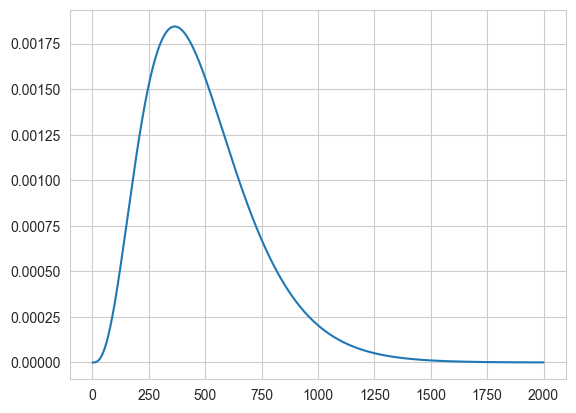

In [64]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom
hypos = np.arange(1, 2001)
uniform = Pmf(1, hypos, name = 'uniform')

def update_binomial(pmf, k):
    """Update a PMF using the binomial likelihood for one birthday observation."""
    xs = pmf.qs  # hypotheses: number of people
    p = 1 / 365  # birthday probability
    likelihood = binom.pmf(k, xs, p)  # vectorized over all hypotheses
    pmf *= likelihood
    pmf.normalize()


data_points = [2, 1, 0]
posterior = uniform.copy()

for k in data_points:
    update_binomial(posterior, k)

posterior.mean(), posterior.credible_interval(0.9)
posterior.plot(label = "Posteriory PMF")
print(f"Mean estimate: {posterior.mean():.1f}")
print(f"P(n > 1200):{posterior[posterior.qs > 1200].sum():.4f}")


In [108]:
from empiricaldist import Pmf
from scipy.stats import binom
import numpy as np
from scipy.special import comb
from sympy import S
from sympy.functions.combinatorial.numbers import stirling

def prob_unique(q, n, N):
    """Compute P(q unique rabbits in n sightings | N total rabbits)."""
    from scipy.special import comb
    return float(stirling(n, q, kind=2)) * comb(N, q) * np.math.factorial(q) / (N**n)


# Hypotheses: total number of rabbits (between 4 and 10)
hypos = np.arange(4, 11)
dist = Pmf(1, hypos, name='Uniform')
dist.normalize()

def prob_unique(q, n, N):
    """Compute P(q unique rabbits in n sightings | N total rabbits)."""
    from scipy.special import comb
    return float(stirling(n, q, kind=2)) * comb(N, q) * np.math.factorial(q) / (N**n)

def update_rabbits(pmf, q, n):
    '''Update based on q distinct rabbits observed in n sightings.'''
    xs = pmf.qs
    likelihood = np.array([prob_unique(q, n, N) if N >= q else 0 for N in xs])
    pmf *= likelihood
    pmf.normalize()

update_rabbits(dist, 2, 3)

In [110]:
dist

,probs
4,0.206730
5,0.176410
6,0.153134
7,0.135008
8,0.120593
9,0.108895
10,0.099231


In [119]:
import numpy as np
from empiricaldist import Pmf

# 1. Actual sentence lengths and their equal prior probability
sentences = np.array([1, 2, 3])
prior = Pmf(1, sentences)
prior.normalize()

# 2. Construct observed distribution by weighting by sentence length (length bias)
# P(observed) ∝ sentence_length × P(length)
biased = prior * sentences
biased.normalize()

# 3. What's the probability the observed prisoner has a 3-year sentence?
prob_3_years = biased[3]

# 4. What's the expected remaining sentence length?
expected_remaining = biased.mean()

# Display results
print("Observed distribution:", biased)
print("P(3-year sentence | observed):", prob_3_years)
print("Expected remaining sentence length:", expected_remaining)


Observed distribution: 1    0.166667
2    0.333333
3    0.500000
dtype: float64
P(3-year sentence | observed): 0.5
Expected remaining sentence length: 2.333333333333333


In [124]:
import numpy as np

# Family sizes: assume 4+ as 4.5
children = np.array([1, 2, 3, 4.5])
frequencies = np.array([22, 41, 24, 14])  # from 2014 data

# Convert to probabilities
prob = frequencies / frequencies.sum()

# Expected number of children
expected_children = np.sum(children * prob)
print(f"Expected number of children: {expected_children:.2f}")


Expected number of children: 2.37


In [125]:
prob

array([0.21782178, 0.40594059, 0.23762376, 0.13861386])

In [141]:
from empiricaldist import Pmf
import numpy as np

# Total possible population sizes (in billions)
lengths = np.array([200e9, 2000e9])
prior = Pmf(1, lengths)
prior.normalize()


2

In [142]:
# Data: you are the 108-billionth person
d = 108e9

# Likelihood: P(d | N) = 1 / N for each hypothesis
likelihood = 1 / lengths

# Bayesian update: multiply prior by likelihood
posterior = prior * likelihood
posterior.normalize()

# Results
print(posterior)
print(f"P(short-lived civilization): {posterior[200e9]:.3f}")
print(f"P(long-lived civilization):  {posterior[2000e9]:.3f}")


2.000000e+11    0.909091
2.000000e+12    0.090909
dtype: float64
P(short-lived civilization): 0.909
P(long-lived civilization):  0.091


In [140]:
posterior

,probs
0,0.5
1,0.5


In [148]:
def odds(p):
    return p/ (1 - p)
def prob(o):
    return o / (o + 1)

def prob2(yes, no):
    return yes / (yes + no)

In [149]:
odds(0.9)

9.000000000000002

In [150]:
prob2(3, 2)

0.6

In [155]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds
post_prob = prob(post_odds)
post_prob

0.6

In [156]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

In [157]:
post_prob = prob(post_odds)
post_prob

0.42857142857142855

In [158]:
like1 =0.01
like2 = 2* 0.6 * 0.01

likelihood_ratio = like1 / like2